In [3]:
model1name = "Bonzanni2013"
model2name = "Krumsiek2011"

In [14]:
from rpy2.robjects.packages import importr
boolnet = importr("BoolNet")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from rpy2.robjects.lib import grdevices
from IPython.display import Image, display

INFO cffi mode is CFFI_MODE.ANY
INFO R home found: /opt/conda/lib/R
INFO R library path: 
INFO LD_LIBRARY_PATH: 
INFO Default options to initialize R: rpy2, --quiet, --no-save
INFO R is already initialized. No need to initialize.


In [4]:
import pyboolnet
from pyboolnet.file_exchange import bnet2primes
import pyboolnet.state_transition_graphs as stgs

In [15]:
# State transition graph
net = boolnet.loadSBML("persistent/Models/" + model1name + ".sbml")
attr_graph = boolnet.getAttractors(net)


In [17]:
print(attr_graph)

Attractor 1 is a simple attractor consisting of 1 state(s) and has a basin of 134 state(s):

 |--<----------|
 V             |
 00000000000   |
 V             |
 |-->----------|


Genes are encoded in the following order: SPI1 GATA1 GATA2 TAL1 ZFPM1 FLI1 ERG CBFA2T3 RUNX1 SMAD6 HHEX

Attractor 2 is a simple attractor consisting of 1 state(s) and has a basin of 16 state(s):

 |--<----------|
 V             |
 01010000000   |
 V             |
 |-->----------|


Genes are encoded in the following order: SPI1 GATA1 GATA2 TAL1 ZFPM1 FLI1 ERG CBFA2T3 RUNX1 SMAD6 HHEX

Attractor 3 is a simple attractor consisting of 2 state(s) and has a basin of 1258 state(s):

 |--<----------|
 V             |
 10011111011   |
 10110100111   |
 V             |
 |-->----------|


Genes are encoded in the following order: SPI1 GATA1 GATA2 TAL1 ZFPM1 FLI1 ERG CBFA2T3 RUNX1 SMAD6 HHEX

Attractor 4 is a simple attractor consisting of 2 state(s) and has a basin of 640 state(s):

 |--<----------|
 V             |
 

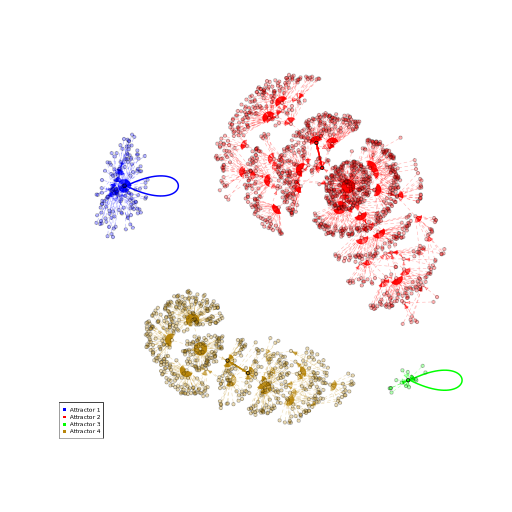

In [18]:
# Use grdevices to capture the plot output
with grdevices.render_to_bytesio(grdevices.png, width=512, height=512, res=72) as img:
    boolnet.plotStateGraph(attr_graph)
# Display the captured image
image_data = img.getvalue()
display(Image(data=image_data))
# plt.savefig("state_transition_graph.png")

In [43]:
net_or = boolnet.loadSBML("persistent/Models/merged_or_" + model1name + "_" + model2name + ".sbml")
attr_graph_or = boolnet.getAttractors(net_or)

# Use grdevices to capture the plot output
with grdevices.render_to_bytesio(grdevices.png, width=512, height=512, res=72) as img:
    boolnet.plotStateGraph(attr_graph_or)
# Display the captured image
image_data = img.getvalue()
display(Image(data=image_data))
# plt.savefig("state_transition_graph_or.png")

: 

: 

: 

In [21]:
primes = bnet2primes("persistent/Models/" + model1name + ".txt")
stg = stgs.primes2stg(primes, 'synchronous')
print(stg)

DiGraph with 2048 nodes and 2048 edges


In [5]:
primes_or = bnet2primes("persistent/Models/merged_or_" + model1name + "_" + model2name + ".txt")
stg_or = stgs.primes2stg(primes_or, 'asynchronous')
print(stg_or)
stgs.stg2image(stg, "Bonzanni2013_stg_tendencies.pdf")

WARNING The state transition graph will consist of up to 2**18=262144 states, depending on the initial states.
DiGraph with 262144 nodes and 2276354 edges


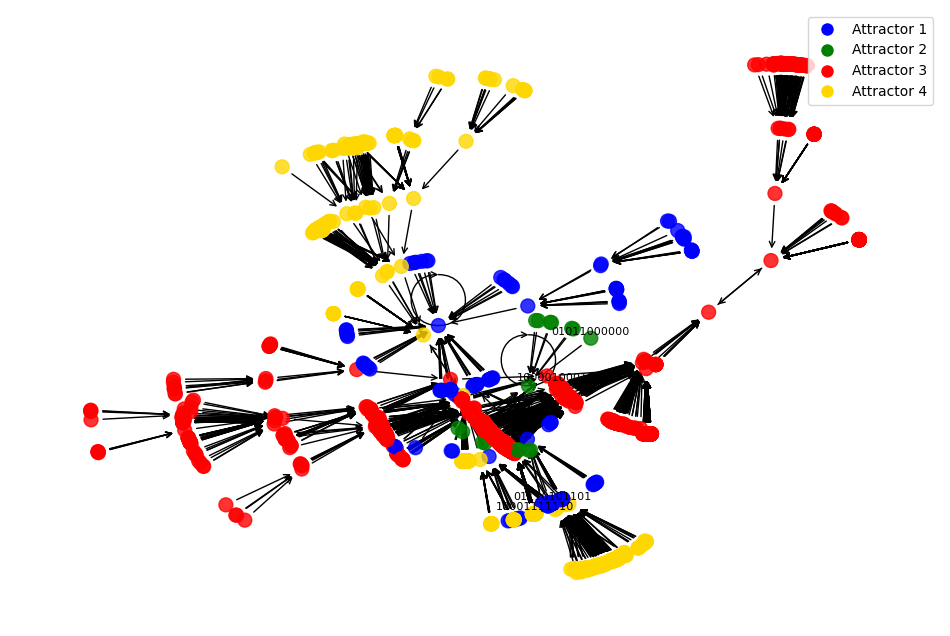

In [38]:
import os
import networkx as nx
import matplotlib.pyplot as plt
from pyboolnet.file_exchange import bnet2primes
from pyboolnet.attractors import compute_attractors
from pyboolnet.interaction_graphs import primes2igraph

In [35]:


# Function to load primes from a file
def load_primes_from_bnet(file_path):
    return bnet2primes(file_path)

# Paths to your models (update with your actual file paths)
model1_path = "persistent/Models/" + model1name + ".txt"
model2_path = "persistent/Models/" + model2name + ".txt"
merged_model_path = "persistent/Models/merged_or_" + model1name + "_" + model2name + ".txt"

# Load primes for each model
primes_model1 = load_primes_from_bnet(model1_path)
primes_model2 = load_primes_from_bnet(model2_path)
primes_merged = load_primes_from_bnet(merged_model_path)

# Compute attractors for each model using BDD-based methods
attrs_model1 = compute_attractors(primes_model1, update="asynchronous")
attrs_model2 = compute_attractors(primes_model2, update="asynchronous")
attrs_merged = compute_attractors(primes_merged, update="asynchronous")


INFO attractors.completeness(..)
INFO created /tmp/pyboolnet_wc0pu0rx
INFO yes
INFO  working on minimal trapspace 1/3: 00000000000
INFO attractors.univocality(..)
INFO  yes
INFO attractors.faithfulness(..)
INFO yes
INFO attractors.find_attractor_state_by_randomwalk_and_ctl(..)
INFO find_attractor_state_by_randomwalk_and_ctl(..)
INFO len(primes)=11, update=asynchronous, length=110, attempts=10
INFO trial 0
INFO start: 00000000000
INFO end: 00000000000
INFO created /tmp/pyboolnet_0j6arhvy
INFO is attractor state
INFO  working on minimal trapspace 2/3: --10-1-111-
INFO attractors.univocality(..)
INFO find_attractor_state_by_randomwalk_and_ctl(..)
INFO len(primes)=5, update=asynchronous, length=50, attempts=10
INFO trial 0
INFO start: 01001
INFO end: 01001
INFO created /tmp/pyboolnet_83s25ng6
INFO is attractor state
INFO created /tmp/pyboolnet_qc8g7q18
INFO  yes
INFO attractors.faithfulness(..)
INFO created /tmp/pyboolnet_alv85znk
INFO yes
INFO attractors.find_attractor_state_by_randomwalk

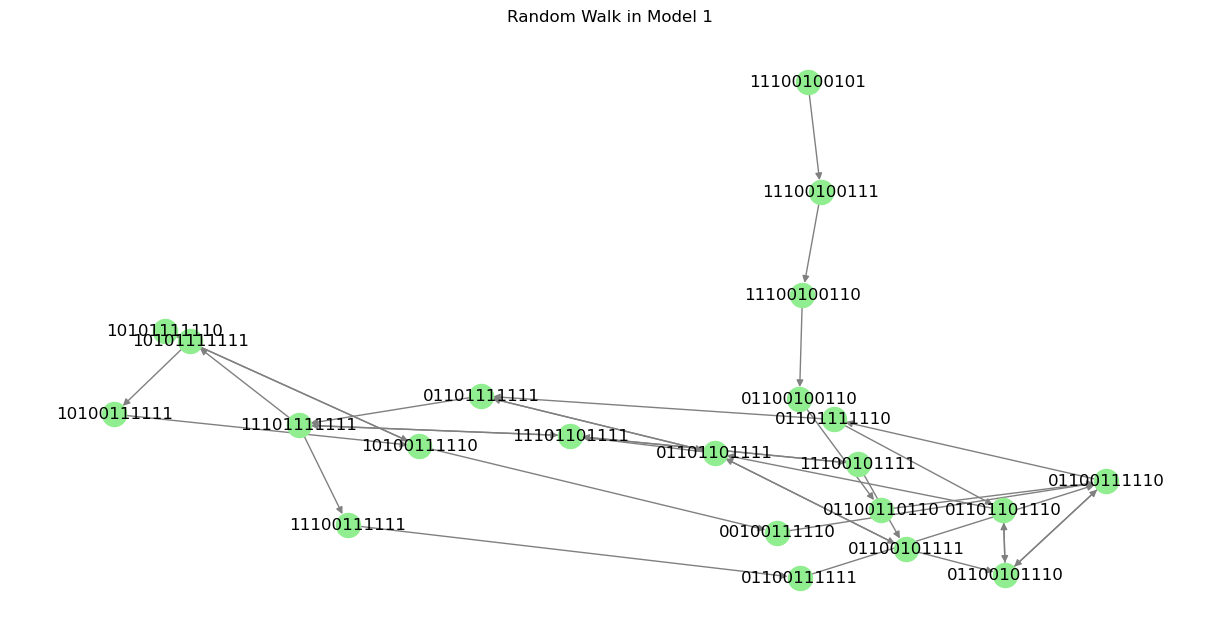

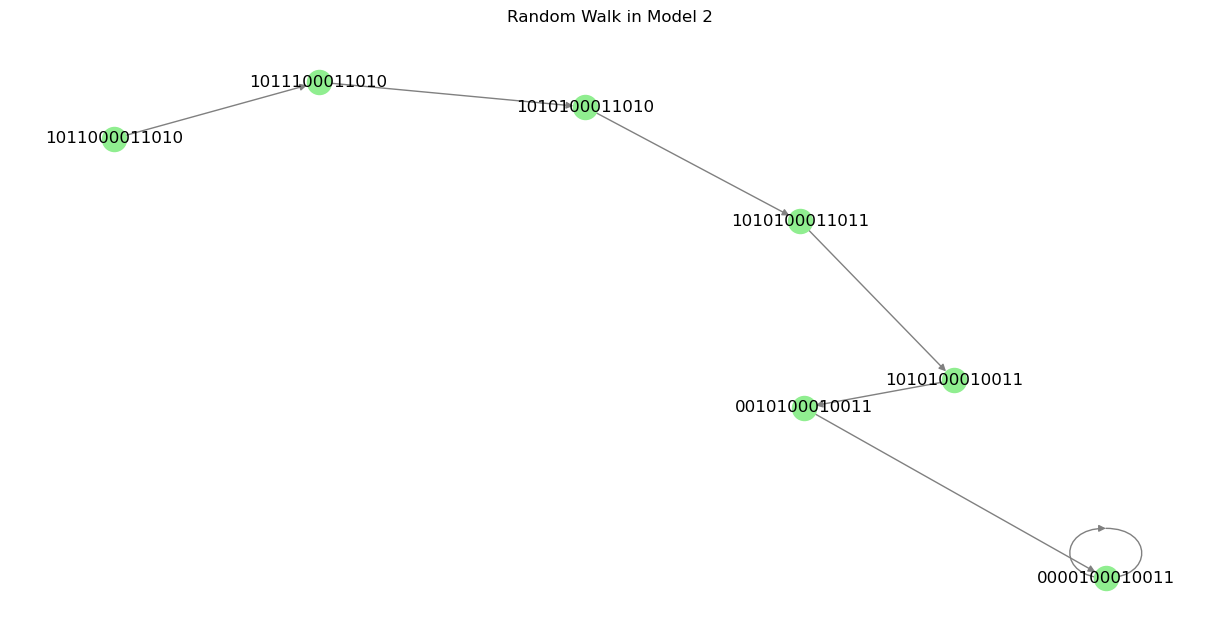

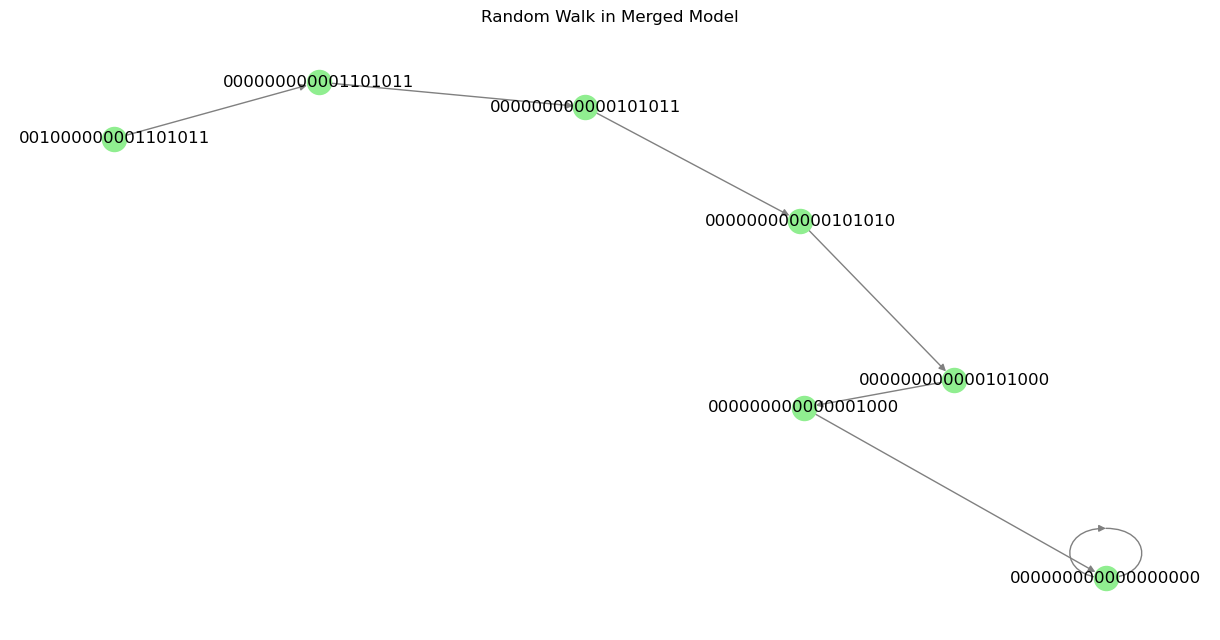

In [42]:
from pyboolnet.state_transition_graphs import random_walk
from pyboolnet.state_space import subspace2dict, subspace2str, state2dict, state2str, random_state
import random

# Function to perform and visualize a random walk
def perform_random_walk(primes, model_name, walk_length=50):
    # Start from a random state
    initial_state = random_state(primes)
    
    # Perform random walk
    path = random_walk(primes, update="asynchronous", initial_state=initial_state, length=walk_length)
    
    # Convert states to strings for visualization
    states_str = [state2str(state) for state in path]
    
    # Create a graph from the path
    G = nx.DiGraph()
    edges = [(states_str[i], states_str[i+1]) for i in range(len(states_str)-1)]
    G.add_edges_from(edges)
    
    # Plot the path
    plt.figure(figsize=(12, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=300, edge_color='gray', arrows=True)
    plt.title(f"Random Walk in {model_name}")
    plt.show()
    
    return path

# Perform random walks for each model
path_model1 = perform_random_walk(primes_model1, "Model 1")
path_model2 = perform_random_walk(primes_model2, "Model 2")
path_merged = perform_random_walk(primes_merged, "Merged Model")


In [49]:
from pyboolnet.attractors import compute_attractors_tarjan
from pyboolnet.trap_spaces import compute_trap_spaces

# Function to compute basin sizes
def compute_basin_sizes(primes, attrs):
    # For large networks, exact basin computation is infeasible
    # We can approximate basin sizes via sampling or use qualitative analysis
    # Here, we'll just list attractors as a placeholder
    print("Attractors:")
    for i, attr in enumerate(attrs["attractors"], 1):
        print(f"Attractor {i}:")
        print(attr)
        print()
        
# Compute and print basin sizes (placeholder) for each model
print("Model 1 Basins:")
compute_basin_sizes(primes_model1, attrs_model1)

print("Model 2 Basins:")
compute_basin_sizes(primes_model2, attrs_model2)

print("Merged Model Basins:")
compute_basin_sizes(primes_merged, attrs_merged)


Model 1 Basins:
Attractors:
Attractor 1:
{'min_trap_space': {'str': '00000000000', 'dict': {'ZFPM1': 0, 'TAL1': 0, 'SPI1': 0, 'SMAD6': 0, 'RUNX1': 0, 'HHEX': 0, 'GATA2': 0, 'GATA1': 0, 'FLI1': 0, 'ERG': 0, 'CBFA2T3': 0}, 'prop': '!CBFA2T3&!ERG&!FLI1&!GATA1&!GATA2&!HHEX&!RUNX1&!SMAD6&!SPI1&!TAL1&!ZFPM1', 'is_univocal': 'yes', 'is_faithful': 'yes'}, 'state': {'str': '00000000000', 'dict': {'CBFA2T3': 0, 'ERG': 0, 'FLI1': 0, 'GATA1': 0, 'GATA2': 0, 'HHEX': 0, 'RUNX1': 0, 'SMAD6': 0, 'SPI1': 0, 'TAL1': 0, 'ZFPM1': 0}, 'prop': '!CBFA2T3&!ERG&!FLI1&!GATA1&!GATA2&!HHEX&!RUNX1&!SMAD6&!SPI1&!TAL1&!ZFPM1'}, 'is_steady': True, 'is_cyclic': False}

Attractor 2:
{'min_trap_space': {'str': '00010000010', 'dict': {'ZFPM1': 0, 'TAL1': 1, 'SPI1': 0, 'SMAD6': 0, 'RUNX1': 0, 'HHEX': 0, 'GATA2': 0, 'GATA1': 1, 'FLI1': 0, 'ERG': 0, 'CBFA2T3': 0}, 'prop': '!CBFA2T3&!ERG&!FLI1&GATA1&!GATA2&!HHEX&!RUNX1&!SMAD6&!SPI1&TAL1&!ZFPM1', 'is_univocal': 'yes', 'is_faithful': 'yes'}, 'state': {'str': '00010000010', 'di

INFO attractors.completeness(..)
INFO created /tmp/pyboolnet_pkhtan9u
INFO no
INFO  working on minimal trapspace 1/5: 1100010111000-1111
INFO attractors.univocality(..)
INFO find_attractor_state_by_randomwalk_and_ctl(..)
INFO len(primes)=1, update=synchronous, length=10, attempts=10
INFO trial 0
INFO start: 1
INFO end: 1
INFO created /tmp/pyboolnet_80qaucuu
INFO is attractor state
INFO created /tmp/pyboolnet_ns8hgcyj
INFO  yes
INFO attractors.faithfulness(..)
INFO created /tmp/pyboolnet_be1tj3p1
INFO yes
INFO attractors.find_attractor_state_by_randomwalk_and_ctl(..)
INFO find_attractor_state_by_randomwalk_and_ctl(..)
INFO len(primes)=18, update=synchronous, length=180, attempts=10
INFO trial 0
INFO start: 110001011100001111
INFO end: 110001011100001111
INFO created /tmp/pyboolnet_r039tj_i
INFO is attractor state
INFO  working on minimal trapspace 2/5: 000000100001000011
INFO attractors.univocality(..)
INFO  yes
INFO attractors.faithfulness(..)
INFO yes
INFO attractors.find_attractor_st

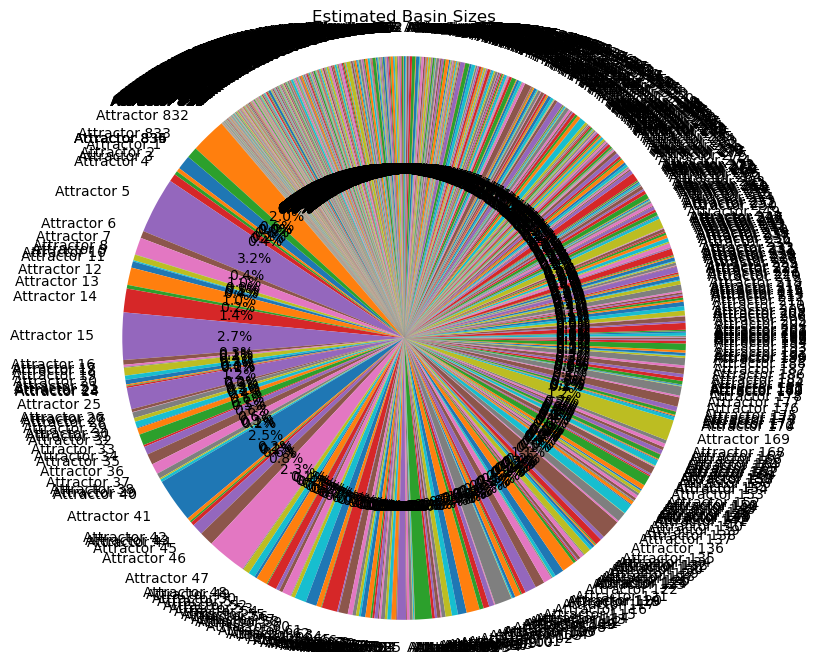

In [51]:
import os
import random
import matplotlib.pyplot as plt
from pyboolnet.file_exchange import bnet2primes
from pyboolnet.attractors import compute_attractors
from pyboolnet.state_transition_graphs import successor_synchronous
from pyboolnet.state_space import random_state

# Function to load primes from a file
def load_primes_from_bnet(file_path):
    return bnet2primes(file_path)

# Paths to your models (update with your actual file paths)
merged_model_path = "persistent/Models/merged_or_" + model1name + "_" + model2name + ".txt"

# Load primes for the merged model
primes = load_primes_from_bnet(merged_model_path)

# Compute attractors
attrs = compute_attractors(primes, update="synchronous")

# Extract attractor states
attractor_states = []
for attr in attrs["attractors"]:
    # For synchronous update, attractors are steady states or cycles
    # We will handle both cases
    if attr["is_steady"]:
        state = attr["state"]["str"]
        attractor_states.append(state)
    else:
        # For cycles, use a tuple of states as the attractor identifier
        cycle_states = tuple(attr["state"]["str"])
        attractor_states.append(cycle_states)

# Create a mapping from attractor identifiers to indices for easy reference
attractor_indices = {str(attr): idx for idx, attr in enumerate(attractor_states)}

# Function to simulate the network dynamics from an initial state
def simulate_to_attractor(primes, initial_state, max_steps=1000):
    current_state = initial_state
    visited_states = set()
    steps = 0
    while steps < max_steps:
        # For synchronous update
        next_state = successor_synchronous(primes, current_state)
        next_state_str = ''.join(str(next_state[var]) for var in sorted(primes.keys()))
        # Check if we've reached an attractor
        for attr in attractor_states:
            if isinstance(attr, str) and next_state_str == attr:
                return str(attr)
            elif isinstance(attr, tuple) and next_state_str in attr:
                return str(attr)
        # Detect cycles
        if next_state_str in visited_states:
            # Return the detected cycle as the attractor
            cycle = tuple(sorted(visited_states))
            return str(cycle)
        visited_states.add(next_state_str)
        current_state = next_state
        steps += 1
    # If max_steps reached without finding an attractor
    return None

# Sampling function
def estimate_basin_sizes(primes, attractor_states, num_samples=1000):
    basin_counts = {str(attr): 0 for attr in attractor_states}
    num_variables = len(primes)
    for i in range(num_samples):
        # Generate a random initial state
        initial_state = random_state(primes)
        # Simulate to attractor
        attractor = simulate_to_attractor(primes, initial_state)
        if attractor in basin_counts:
            basin_counts[attractor] += 1
        else:
            # If we encounter an attractor not in our list, add it
            basin_counts[attractor] = 1
    # Calculate proportions
    total = sum(basin_counts.values())
    basin_sizes = {attr: count / total for attr, count in basin_counts.items()}
    return basin_sizes

# Estimate basin sizes
num_samples = 10000  # Adjust based on computational resources
basin_sizes = estimate_basin_sizes(primes, attractor_states, num_samples=num_samples)

# Visualize the basins
def visualize_basin_sizes(basin_sizes):
    labels = [f"Attractor {idx+1}" for idx in range(len(basin_sizes))]
    sizes = list(basin_sizes.values())
    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Estimated Basin Sizes")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Since the keys may not be in order, sort them
sorted_basin_sizes = dict(sorted(basin_sizes.items(), key=lambda item: attractor_indices.get(item[0], -1)))

# Call the visualization function
visualize_basin_sizes(sorted_basin_sizes)


In [57]:
import random
import matplotlib.pyplot as plt
from pyboolnet.attractors import compute_attractors
from pyboolnet.state_space import state_is_in_subspace
from pyboolnet.state_transition_graphs import successors_asynchronous
from pyboolnet.state_transition_graphs import state2dict


# Function to compute Hamming neighbors (states differing by one bit)
def hamming_neighbors(state_str):
    neighbors = []
    state_list = list(state_str)
    for i in range(len(state_list)):
        flipped_state = state_list.copy()
        flipped_state[i] = '1' if state_list[i] == '0' else '0'
        neighbors.append(''.join(flipped_state))
    return neighbors

# Function to analyze perturbations around attractors
def analyze_attractor_perturbations(primes, attrs):
    attractor_states = []
    for idx, attr in enumerate(attrs["attractors"]):
        print(f"\nAnalyzing Attractor {idx+1}:")
        if attr["is_steady"]:
            state_str = attr["state"]["str"]
            print(f"Steady state: {state_str}")
            attractor_states.append(state_str)
            # Generate Hamming neighbors
            neighbors = hamming_neighbors(state_str)
            for neighbor_str in neighbors:
                neighbor_state = state2dict(primes, neighbor_str)
                # Simulate dynamics from neighbor state
                current_state = neighbor_state.copy()
                visited_states = set()
                steps = 0
                max_steps = 1000
                while steps < max_steps:
                    current_state_str = ''.join(str(current_state[var]) for var in sorted(primes.keys()))
                    # Check if we've reached an attractor
                    for i, attr in enumerate(attrs["attractors"]):
                        attr_states = attr["state"]["str"]
                        if current_state_str in attr_states:
                            if current_state_str == state_str:
                                print(f"Neighbor {neighbor_str} returns to Attractor {idx+1}")
                            else:
                                print(f"Neighbor {neighbor_str} leads to Attractor {i+1}")
                            break
                    if current_state_str in visited_states:
                        # Entered a cycle or repeating states
                        break
                    visited_states.add(current_state_str)
                    # Get successors
                    successors = successors_asynchronous(primes, current_state)
                    if not successors:
                        break
                    # Randomly select one successor
                    current_state = random.choice(successors)
                    steps += 1
        else:
            print("Cyclic attractor; perturbation analysis is more complex.")
            # You can extend this part to handle cyclic attractors if needed

# Assuming you have primes_merged and attrs_merged
analyze_attractor_perturbations(primes_merged, attrs_merged)



Analyzing Attractor 1:
Steady state: 000000000000000000
Neighbor 100000000000000000 returns to Attractor 1
Neighbor 100000000000000000 returns to Attractor 1
Neighbor 001000000000000000 returns to Attractor 1
Neighbor 001000000000000000 returns to Attractor 1
Neighbor 000100000000000000 returns to Attractor 1
Neighbor 000100000000000000 returns to Attractor 1
Neighbor 000000010000000000 returns to Attractor 1
Neighbor 000000010000000000 returns to Attractor 1
Neighbor 000000001000000000 returns to Attractor 1
Neighbor 000000001000000000 returns to Attractor 1
Neighbor 000000000100000000 returns to Attractor 1
Neighbor 000000000100000000 returns to Attractor 1
Neighbor 000000000010000000 returns to Attractor 1
Neighbor 000000000010000000 returns to Attractor 1
Neighbor 000000000001000000 returns to Attractor 1
Neighbor 000000000001000000 returns to Attractor 1
Neighbor 000000000000100000 returns to Attractor 1
Neighbor 000000000000100000 returns to Attractor 1
Neighbor 0000000000000100

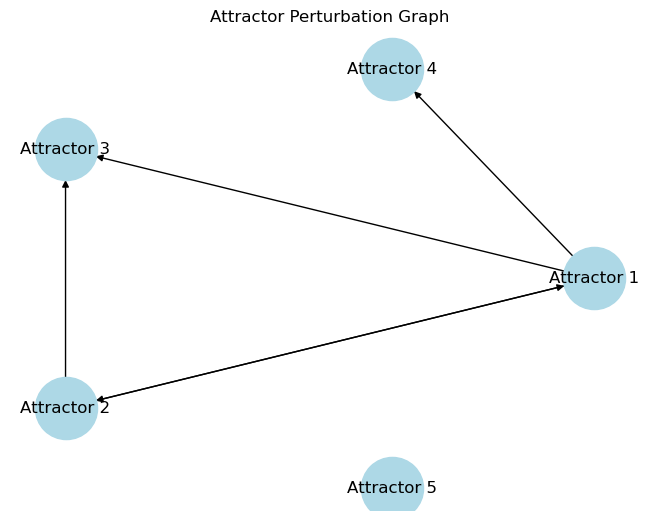

In [58]:
import networkx as nx

def create_attractor_perturbation_graph(primes, attrs):
    G = nx.DiGraph()
    attractor_nodes = []
    for idx, attr in enumerate(attrs["attractors"]):
        attr_node = f"Attractor {idx+1}"
        G.add_node(attr_node, shape='circle', color='lightblue')
        attractor_nodes.append(attr_node)
        if attr["is_steady"]:
            state_str = attr["state"]["str"]
            neighbors = hamming_neighbors(state_str)
            for neighbor_str in neighbors:
                neighbor_state = state2dict(primes, neighbor_str)
                # Simulate dynamics from neighbor state
                current_state = neighbor_state.copy()
                visited_states = set()
                steps = 0
                max_steps = 1000
                while steps < max_steps:
                    current_state_str = ''.join(str(current_state[var]) for var in sorted(primes.keys()))
                    # Check if we've reached an attractor
                    found_attractor = False
                    for i, attr2 in enumerate(attrs["attractors"]):
                        attr_states = attr2["state"]["str"]
                        if current_state_str in attr_states:
                            target_attr_node = f"Attractor {i+1}"
                            if target_attr_node != attr_node:
                                # Add an edge from original attractor to target attractor
                                G.add_edge(attr_node, target_attr_node)
                            found_attractor = True
                            break
                    if found_attractor:
                        break
                    if current_state_str in visited_states:
                        # Entered a cycle or repeating states
                        break
                    visited_states.add(current_state_str)
                    # Get successors
                    successors = successors_asynchronous(primes, current_state)
                    if not successors:
                        break
                    # Randomly select one successor
                    current_state = random.choice(successors)
                    steps += 1
        else:
            # Handle cyclic attractors if needed
            pass
    # Draw the graph
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrows=True)
    plt.title("Attractor Perturbation Graph")
    plt.show()

create_attractor_perturbation_graph(primes_merged, attrs_merged)


Attractor 1, is_steady: True
Attractor 2, is_steady: True
Attractor 3, is_steady: False
Attractor 4, is_steady: False
Attractor 5, is_steady: False


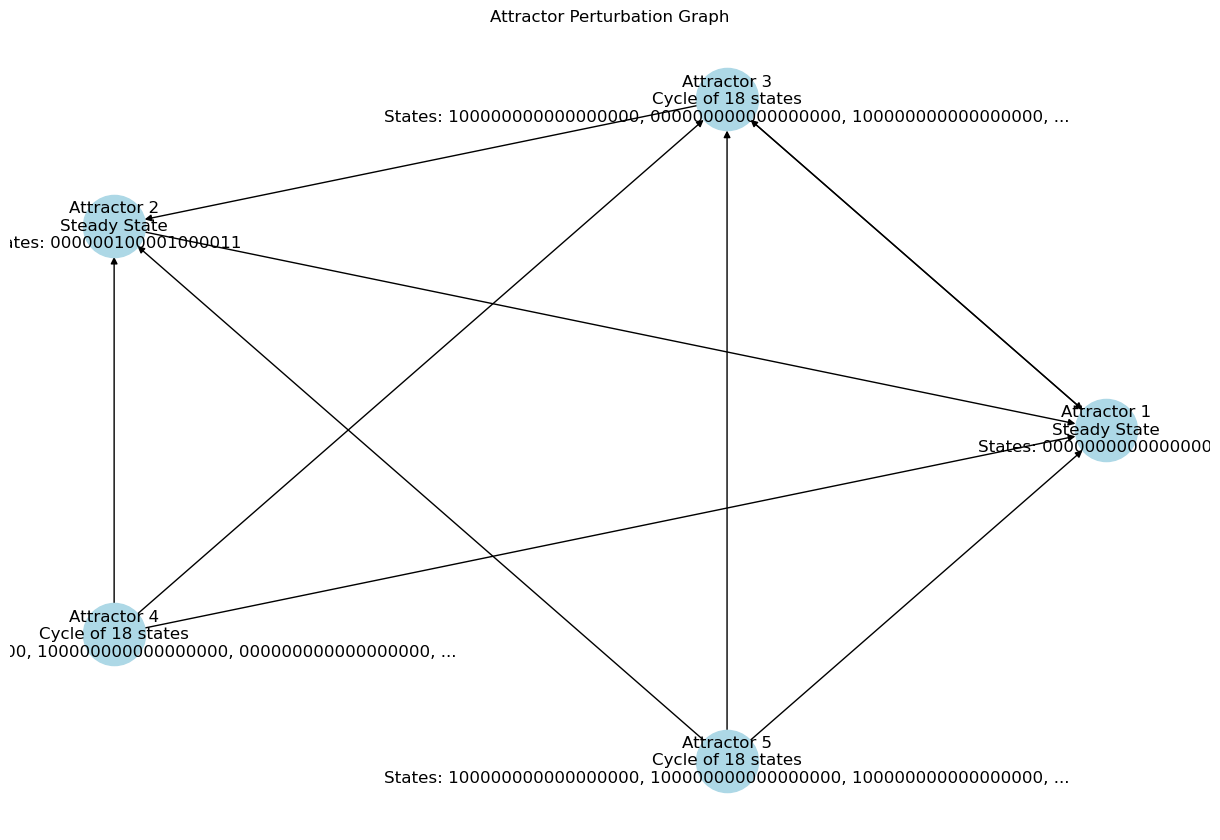

In [71]:
import random
import matplotlib.pyplot as plt
import networkx as nx
from pyboolnet.state_transition_graphs import state2dict, successors_asynchronous

def hamming_neighbors(state_str):
    neighbors = []
    state_list = list(state_str)
    for i in range(len(state_list)):
        if state_list[i] in ['0', '1']:
            flipped_state = state_list.copy()
            flipped_state[i] = '1' if state_list[i] == '0' else '0'
            neighbors.append(''.join(flipped_state))
    return neighbors

def create_attractor_perturbation_graph(primes, attrs):
    G = nx.DiGraph()
    attractor_nodes = []
    variables = sorted(primes.keys())
    num_vars = len(variables)
    for idx, attr in enumerate(attrs["attractors"]):
        print(f"Attractor {idx+1}, is_steady: {attr['is_steady']}")
        # Get the states of the attractor
        if attr["is_steady"]:
            state_str = attr["state"]["str"]
            # Handle unspecified variables
            state_str_filled = state_str.replace('-', '0')
            if len(state_str_filled) < num_vars:
                # Pad the state string to the correct length
                num_missing = num_vars - len(state_str_filled)
                state_str_filled += '0' * num_missing
            states = [state_str_filled]
            attr_type = "Steady State"
        else:
            # For cycles, get the list of state strings
            if 'str' in attr['state']:
                state_list = attr["state"]["str"]
            elif 'state_strings' in attr['state']:
                state_list = attr["state"]["state_strings"]
            else:
                print(f"Unknown state format for cyclic attractor {idx+1}")
                continue
            states = []
            for s in state_list:
                s_filled = s.replace('-', '0')
                if len(s_filled) < num_vars:
                    num_missing = num_vars - len(s_filled)
                    s_filled += '0' * num_missing
                states.append(s_filled)
            attr_type = f"Cycle of {len(states)} states"
        # Prepare the node label with the attractor number and states
        if len(states) <= 3:
            attr_states_str = ', '.join(states)
        else:
            attr_states_str = ', '.join(states[:3]) + ', ...'
        attr_node_label = f"Attractor {idx+1}\n{attr_type}\nStates: {attr_states_str}"
        G.add_node(idx, label=attr_node_label)
        attractor_nodes.append(idx)
        # For each state in the attractor, generate perturbations
        for state_str in states:
            neighbors = hamming_neighbors(state_str)
            for neighbor_str in neighbors:
                neighbor_str_filled = neighbor_str.replace('-', '0')
                if len(neighbor_str_filled) < num_vars:
                    num_missing = num_vars - len(neighbor_str_filled)
                    neighbor_str_filled += '0' * num_missing
                neighbor_state = state2dict(primes, neighbor_str_filled)
                # Simulate dynamics from neighbor state
                current_state = neighbor_state.copy()
                visited_states = set()
                steps = 0
                max_steps = 1000
                while steps < max_steps:
                    current_state_str = ''.join(str(current_state[var]) for var in variables)
                    # Check if we've reached an attractor
                    found_attractor = False
                    for i, attr2 in enumerate(attrs["attractors"]):
                        if attr2["is_steady"]:
                            attr_states2 = [attr2["state"]["str"].replace('-', '0')]
                        else:
                            if 'str' in attr2['state']:
                                attr_states2 = [s.replace('-', '0') for s in attr2["state"]["str"]]
                            elif 'state_strings' in attr2['state']:
                                attr_states2 = [s.replace('-', '0') for s in attr2["state"]["state_strings"]]
                            else:
                                continue
                        attr_states2_filled = []
                        for s in attr_states2:
                            if len(s) < num_vars:
                                s += '0' * (num_vars - len(s))
                            attr_states2_filled.append(s)
                        if current_state_str in attr_states2_filled:
                            if i != idx:
                                # Add an edge from original attractor to target attractor
                                G.add_edge(idx, i)
                            found_attractor = True
                            break
                    if found_attractor:
                        break
                    if current_state_str in visited_states:
                        # Entered a cycle or repeating states
                        break
                    visited_states.add(current_state_str)
                    # Get successors
                    successors = successors_asynchronous(primes, current_state)
                    if not successors:
                        break
                    # Randomly select one successor
                    current_state = random.choice(successors)
                    steps += 1
    # Prepare node labels
    labels = {}
    for idx in G.nodes():
        labels[idx] = G.nodes[idx]['label']
    # Draw the graph
    pos = nx.circular_layout(G)
    plt.figure(figsize=(12,8))
    nx.draw(G, pos, labels=labels, with_labels=True, node_color='lightblue', node_size=2000, arrows=True)
    plt.title("Attractor Perturbation Graph")
    plt.show()


create_attractor_perturbation_graph(primes_merged, attrs_merged)

In [76]:
net_or = boolnet.loadSBML("persistent/Models/merged_or_" + model1name + "_" + model2name + ".sbml")
attr_graph_or = boolnet.getAttractors(net_or)
print(attr_graph_or)

Attractor 1 is a simple attractor consisting of 1 state(s) and has a basin of 5184 state(s):

 |--<-----------------|
 V                    |
 000000000000000000   |
 V                    |
 |-->-----------------|


Genes are encoded in the following order: ERG CBFA2T3 RUNX1 SMAD6 HHEX KLF1 CEBPA JUN EGR1 EGR2 NAB1 GFI1 GATA1 GATA2 ZFPM1 TAL1 SPI1 FLI1

Attractor 2 is a simple attractor consisting of 1 state(s) and has a basin of 2048 state(s):

 |--<-----------------|
 V                    |
 000001000000101100   |
 V                    |
 |-->-----------------|


Genes are encoded in the following order: ERG CBFA2T3 RUNX1 SMAD6 HHEX KLF1 CEBPA JUN EGR1 EGR2 NAB1 GFI1 GATA1 GATA2 ZFPM1 TAL1 SPI1 FLI1

Attractor 3 is a simple attractor consisting of 2 state(s) and has a basin of 64256 state(s):

 |--<-----------------|
 V                    |
 010110011110011111   |
 011110011110011111   |
 V                    |
 |-->-----------------|


Genes are encoded in the following order: ERG C

In [84]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri, numpy2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import IntVector
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

pandas2ri.activate()
boolnet = importr("BoolNet")


Attractor DataFrame loaded successfully:
      ERG  CBFA2T3  RUNX1  SMAD6  HHEX  KLF1  CEBPA  JUN  EGR1  EGR2  NAB1  \
S1.1    0        0      0      0     0     0      0    0     0     0     0   
S2.1    0        0      0      0     0     1      0    0     0     0     0   
S3.1    0        1      0      1     1     0      0    1     1     1     1   
S3.2    0        1      1      1     1     0      0    1     1     1     1   
S4.1    0        1      0      1     1     0      1    0     0     0     0   

      GFI1  GATA1  GATA2  ZFPM1  TAL1  SPI1  FLI1  
S1.1     0      0      0      0     0     0     0  
S2.1     0      1      0      1     1     0     0  
S3.1     0      0      1      1     1     1     1  
S3.2     0      0      1      1     1     1     1  
S4.1     1      0      1      1     1     1     1  
Boolean network loaded successfully.

State to Attractor Mapping (first 5):
State: 000000000000000000 -> Attractor Index: 1
State: 000001000000101100 -> Attractor Index: 2
State:

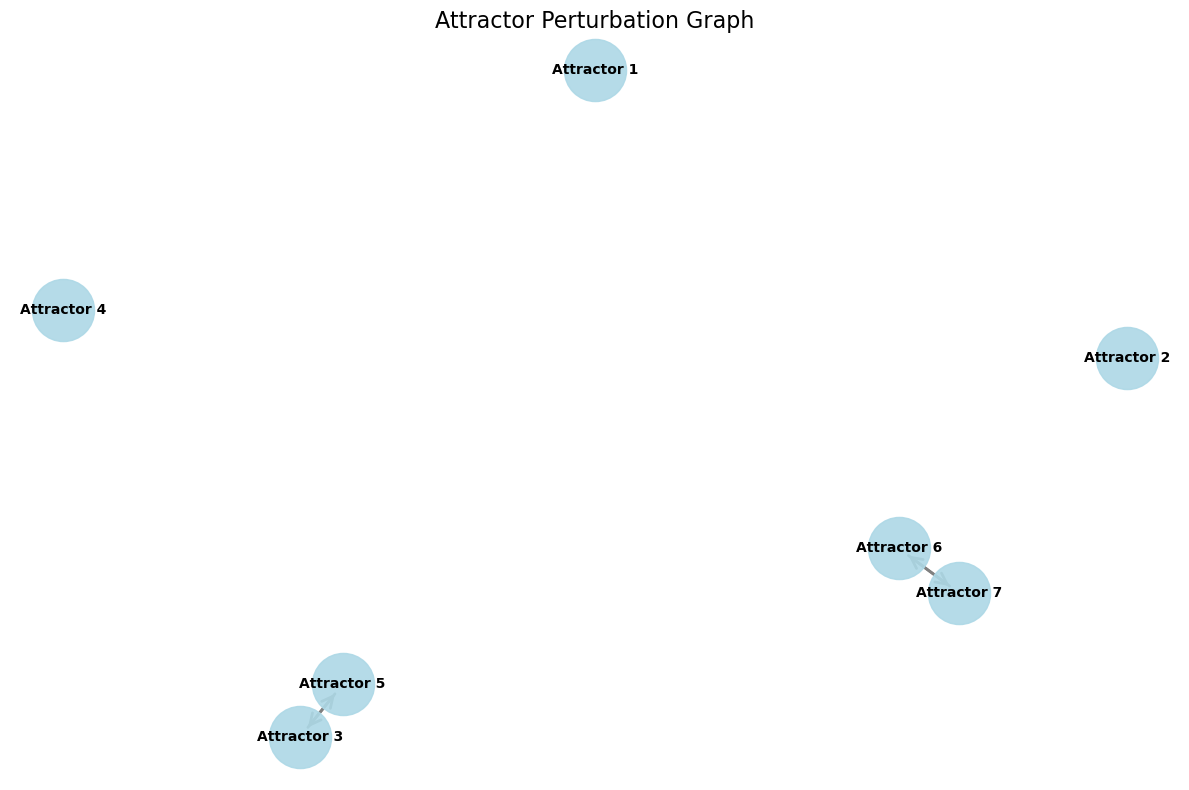

In [118]:

# ------------------------------
# 1. Load the Saved Attractor DataFrame and Boolean Network
# ------------------------------

# Replace 'path_to_your_dataframe.csv' with the actual path to your CSV file
df_path = 'persistent/SimulationResults/attr_merged_or_' + model1name + '_' + model2name + '.csv'  # e.g., 'data/attractors.csv'
df = pd.read_csv(df_path, index_col=0)
print("Attractor DataFrame loaded successfully:")
print(df.head())

# Replace 'path_to_your_network.sbml' with the actual path to your SBML file
sbml_path = 'persistent/Models/merged_or_' + model1name + '_' + model2name + '.sbml'  # e.g., 'networks/my_network.sbml'
try:
    network = boolnet.loadSBML(sbml_path)
    print("Boolean network loaded successfully.")
except Exception as e:
    print(f"Error loading Boolean network from '{sbml_path}': {e}")
    exit(1)  # Exit if network loading fails

# ------------------------------
# 2. Parse Attractor Information
# ------------------------------

# Create a dictionary mapping state strings to attractor indices
state_to_attractor = {}

for attractor_name, row in df.iterrows():
    # Extract attractor index from the row name (e.g., 'S3.1' -> 3)
    try:
        attractor_index = int(attractor_name.split('.')[0][1:])  # Removes 'S' and splits by '.'
    except (IndexError, ValueError) as e:
        print(f"Error parsing attractor name '{attractor_name}': {e}")
        continue
    
    # Convert the row to a binary string representing the state
    state_str = ''.join(str(bit) for bit in row.values)
    
    # Map the state to its attractor index
    state_to_attractor[state_str] = attractor_index

print("\nState to Attractor Mapping (first 5):")
for state, attractor in list(state_to_attractor.items())[:5]:
    print(f"State: {state} -> Attractor Index: {attractor}")

# ------------------------------
# 3. Define Helper Functions
# ------------------------------

def hamming_neighbors(state_str):
    """
    Generate all states that differ by exactly one bit (Hamming distance of 1).
    
    Parameters:
    - state_str (str): Binary string representing the state.
    
    Returns:
    - List[str]: List of neighbor state strings.
    """
    neighbors = []
    state_list = list(state_str)
    for i in range(len(state_list)):
        flipped_state = state_list.copy()
        flipped_state[i] = '1' if state_list[i] == '0' else '0'
        neighbors.append(''.join(flipped_state))
    return neighbors

def simulate_next_state(network, state_str):
    """
    Simulate the next state asynchronously using BoolNet's stateTransition function.
    
    Parameters:
    - network: BoolNet network object.
    - state_str (str): Binary string representing the current state.
    
    Returns:
    - str: Binary string representing the next state.
    """
    # Convert state string to R integer vector with gene names
    state_ints = [int(bit) for bit in state_str]
    state_vector = IntVector(state_ints)
    gene_names = list(network.rx2('genes'))
    state_vector.names = robjects.StrVector(gene_names)
    
    # Simulate the next state asynchronously
    try:
        next_state = boolnet.stateTransition(network, state_vector, type="asynchronous")
    except Exception as e:
        print(f"Error during state transition from '{state_str}': {e}")
        return state_str  # Return the current state if transition fails
    
    # Convert the next state back to a binary string
    next_state_ints = list(next_state)
    next_state_str = ''.join(str(int(bit)) for bit in next_state_ints)
    return next_state_str

def find_attractor(network, initial_state, state_to_attractor, max_steps=100):
    """
    Simulate the dynamics from an initial state until an attractor is reached.
    
    Parameters:
    - network: BoolNet network object.
    - initial_state (str): Binary string representing the initial state.
    - state_to_attractor (dict): Mapping from state strings to attractor indices.
    - max_steps (int): Maximum number of simulation steps.
    
    Returns:
    - int or None: Attractor index if found, else None.
    """
    current_state = initial_state
    visited_states = set()
    steps = 0
    
    while steps < max_steps:
        if current_state in visited_states:
            # Loop detected without reaching an attractor
            return None
        visited_states.add(current_state)
        
        # Check if current state is an attractor
        attractor = state_to_attractor.get(current_state, None)
        if attractor:
            return attractor
        
        # Simulate the next state
        next_state = simulate_next_state(network, current_state)
        if next_state == current_state:
            # Reached a steady state
            attractor = state_to_attractor.get(next_state, None)
            return attractor
        
        current_state = next_state
        steps += 1
    
    return None  # Attractor not found within max_steps

# ------------------------------
# 4. Build the Perturbation Graph
# ------------------------------

def build_perturbation_graph_with_transients(df, state_to_attractor, network, max_steps=1000):
    """
    Build an attractor perturbation graph considering transient states.
    
    Parameters:
    - df (pd.DataFrame): DataFrame with attractors as rows and genes as columns.
    - state_to_attractor (dict): Mapping from state strings to attractor indices.
    - network: BoolNet network object.
    - max_steps (int): Maximum number of simulation steps to find attractors.
    
    Returns:
    - networkx.DiGraph: Directed graph representing attractor perturbations.
    """
    G = nx.DiGraph()
    
    # Extract unique attractor indices
    attractor_indices = set(state_to_attractor.values())
    
    # Add attractor indices as nodes with labels
    for idx in attractor_indices:
        G.add_node(idx, label=f"Attractor {idx}")
    
    # Iterate through each attractor
    for attractor_name, row in df.iterrows():
        # Extract attractor index from the name (e.g., 'S3.1' -> 3)
        try:
            attractor_index = int(attractor_name.split('.')[0][1:])
        except (IndexError, ValueError) as e:
            print(f"Error parsing attractor name '{attractor_name}': {e}")
            continue
        
        # Convert the row to a binary string representing the state
        state_str = ''.join(str(bit) for bit in row.values)
        
        # Generate all single-gene perturbations
        neighbors = hamming_neighbors(state_str)
        
        for neighbor_str in neighbors:
            # Find the attractor reached from the perturbed state
            target_attractor = find_attractor(network, neighbor_str, state_to_attractor, max_steps=max_steps)
            
            if target_attractor and target_attractor != attractor_index:
                # Add a directed edge from the original attractor to the target attractor
                G.add_edge(attractor_index, target_attractor)
    
    return G

# ------------------------------
# 5. Visualize the Perturbation Graph
# ------------------------------

def visualize_graph(G):
    """
    Visualize the attractor perturbation graph using NetworkX and Matplotlib.
    
    Parameters:
    - G (networkx.DiGraph): Directed graph representing attractor perturbations.
    
    Returns:
    - None
    """
    pos = nx.spring_layout(G, seed=42)  # Spring layout for better spacing
    plt.figure(figsize=(12, 8))
    
    # Draw nodes with labels
    labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000, alpha=0.9)
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight='bold')
    
    # Draw edges with arrows
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray', width=2)
    
    plt.title("Attractor Perturbation Graph", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# ------------------------------
# 6. Execute the Process
# ------------------------------

# Build the perturbation graph considering transient states
print("\nBuilding the perturbation graph...")
G = build_perturbation_graph_with_transients(df, state_to_attractor, network, max_steps=10000)
print("Perturbation graph constructed successfully.")

# Visualize the graph
print("\nVisualizing the perturbation graph...")
visualize_graph(G)

# ------------------------------
# 7. Save the Graph (Optional)
# ------------------------------

# Uncomment the following lines to save the graph in GraphML format
# Replace 'path_to_save_graph.graphml' with your desired file path
# save_path = 'path_to_save_graph.graphml'  # e.g., 'results/attractor_perturbation_graph.graphml'
# try:
#     nx.write_graphml(G, save_path)
#     print(f"Perturbation graph saved as '{save_path}'.")
# except Exception as e:
#     print(f"Error saving perturbation graph: {e}")
